#Welcome to OpenCV Surgery 102!

 In This notebook will delve deeper into the fascinating world of computer vision and image processing. We will continue exploring various fundamental techniques using the same set of photos.

OpenCV Surgery 102 focuses on three essential operations:
* Translation
* Rotation
* Flipping

These operations are crucial in manipulating and transforming images to achieve desired effects or extract useful information.

I will systematically explain each operation throughout this notebook, providing clear examples and practical code implementations. By the end, you will have a solid understanding of how to apply translation, rotation, and flipping to enhance your image processing tasks.

So, let's dive in and discover the hidden potential lying beneath the surface of computer vision and image processing!

##Python getting started

Firstly, to get access to images we need to Mount the Google Drive to Google Colab.


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
# Importing the necessary Python packages

# We begin by installing the "pyheif" library using the pip package manager. This library enables us to work with HEIC image files.
!pip install pyheif

import pyheif  # Importing the pyheif library to handle HEIC files and convert them to more widely supported formats
import numpy as np  # Importing numpy for efficient numerical operations and array manipulation
from google.colab.patches import cv2_imshow  # Importing cv2_imshow from google.colab.patches to display images in Google Colab
from PIL import Image  # Importing PIL.Image for image processing capabilities
import cv2  # Importing cv2 from OpenCV for computer vision tasks
import matplotlib.pyplot as plt  # Importing matplotlib.pyplot for creating visualizations
import imutils  # Importing imutils for image resizing, rotating, and cropping
import os  # Importing os for interacting with the operating system, such as file handling and directory manipulation

# These imported packages will be essential for our image processing and computer vision tasks.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


The function bellow will convert a HEIC image into PNG format. This function takes two arguments the heic_path, which is the path to the input HEIC image, and the png_path, the path where the output will be saved as a PNG image.

In [8]:
def convert_heic_to_png(heic_path, png_path):
    """
    Converts a HEIC image to PNG format and saves the output to a specified path.

    Args:
        heic_path (str): Path to the input HEIC image.
        png_path (str): Path to save the output PNG image.

    Returns:
        None.
    """
    heic_image = pyheif.read(heic_path)  # Read the input HEIC image
    rgb_image = Image.frombytes(  # Convert the HEIC image to RGB format
        heic_image.mode,
        heic_image.size,
        heic_image.data,
        "raw",
        heic_image.mode,
        heic_image.stride,
    )
    rgb_image.save(png_path, "PNG")  # Save the RGB image to PNG format at the specified path


To convert the two images conveniently, the **convert_heic_images** function  designed to convert multiple HEIC photos. The first arguments are **heic_paths**, a list of paths to the input HEIC images, and **output_dir**, the dir where the converted PNG images will be saved.

In [10]:

def convert_heic_images(heic_paths, output_dir):
    # Check if the output directory exists and create it if it doesn't
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Iterate over the HEIC image paths and convert each image to PNG format
    for path in heic_paths:
        filename = os.path.basename(path).split(".")[0] + ".png"
        output_path = os.path.join(output_dir, filename)
        convert_heic_to_png(path, output_path)


In [11]:
# Convert the HEIC images to PNG format and save to a new location in the /content directory
heic_paths = ["/content/drive/MyDrive/IMG_1655.HEIC", "/content/drive/MyDrive/IMG_1650.HEIC"]
output_dir = "/content/png_images"
convert_heic_images(heic_paths, output_dir)


##Loading Image with OpenCV






In [13]:
# Load the two converted images
bike = cv2.imread('/content/png_images/IMG_1650.png')
coogee_beach = cv2.imread('/content/png_images/IMG_1655.png')



###Translation with OpenCV

Image translation is a  fundamental technique in computer vision that allows for precise shifts of images in any direction by a specified number of pixels. It has wide-ranging applications, including camera motion correction, image composition adjustment, and preprocessing for advanced analysis. OpenCV provides robust tools for image translation, notably the renowned cv2.warpAffine function.Additionally, the imutils package offers a range of convenience functions for basic image processing operations like translation.

Let's delve into the cv2.warpAffine function, a powerful tool in OpenCV. It operates by utilizing a 2x3 affine transformation matrix that grants us control over each pixel's destiny. Within this matrix, the translation amounts t_{x} and t_{y} hold the key to shifting the image along the x and y directions, respectively. Mastering their interplay allows us to achieve the desired effects with finesse.

1.    Negative values of t_{x} shift the image to the left
2.    Positive values of t_{x} shift it to the right
3.    Negative values of t_{y} shift the image up
4.    Positive values of t_{y} shift it down.
   

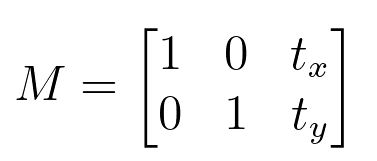


On the other hand, imutils.translate attracts us with its simplicity and ease. By declaring the shift amounts, this tool constructs the translation matrix internally, making translation operations straightforward and effortless. It prioritizes convenience. However, if we require more complex transformations like rotation or scaling, cv2.warpAffine becomes the preferred choice. It offers a versatile canvas for creating intricate designs.

The following code is a guiding light, leading us to master image translation. Explore the provided practical examples and witness the wonders of cv2.warpAffine and imutils.translate in action.

*Hint: When working with image translation, remember to convert the image to the RGB format after applying shifts, as demonstrated in the code examples. This step guarantees that plt.imshow accurately represents your masterpiece with vivid colours.

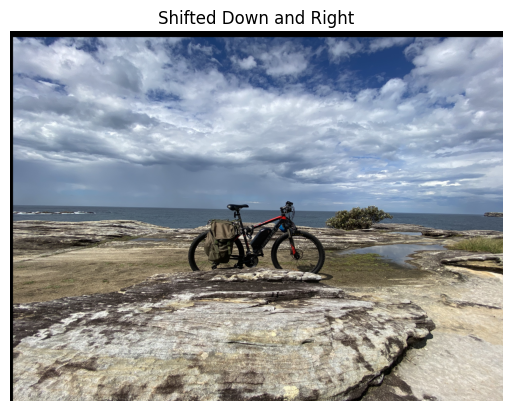

In [14]:
# shift the image 25 pixels to the right and 50 pixels down
M = np.float32([[1, 0, 25], [0, 1, 50]])
shifted = cv2.warpAffine(bike, M, (bike.shape[1], bike.shape[0]))

# convert color space to RGB
shifted = cv2.cvtColor(shifted, cv2.COLOR_BGR2RGB)

# Display the shifted image
plt.imshow(shifted)  # Show the image
plt.title("Shifted Down and Right")  # Set the title of the plot
plt.axis("off")  # Turn off the axis
plt.show()  # Display the plot



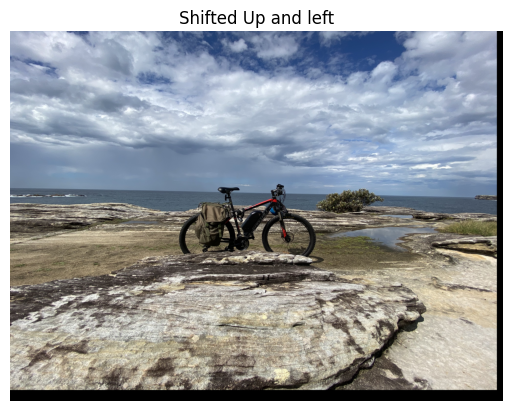

In [15]:
# shift the image 50 pixels to the left and 90 pixels up
M = np.float32([[1, 0, -50], [0, 1, -90]])
shifted = cv2.warpAffine(bike, M, (bike.shape[1], bike.shape[0]))

# convert color space to RGB
shifted = cv2.cvtColor(shifted, cv2.COLOR_BGR2RGB)

# Display the shifted image
plt.imshow(shifted)
plt.title("Shifted Up and left")
plt.axis("off") 
plt.show() 


(-0.5, 4031.5, 3023.5, -0.5)

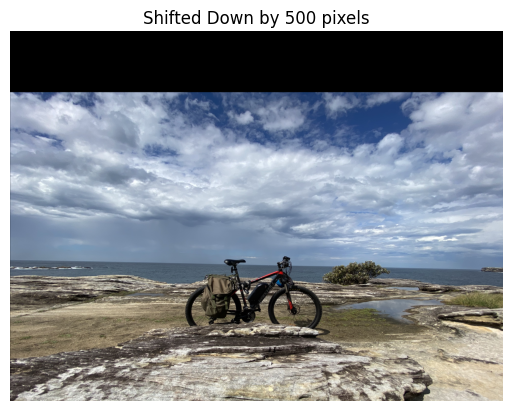

In [16]:
# Shift the image down by 500 pixels
shifted = imutils.translate(bike, 1, 500)
# Convert color space to RGB
shifted = cv2.cvtColor(shifted, cv2.COLOR_BGR2RGB)

# Display the shifted image
plt.imshow(shifted)
plt.title("Shifted Down by 500 pixels")
plt.axis("off")

(-0.5, 4031.5, 3023.5, -0.5)

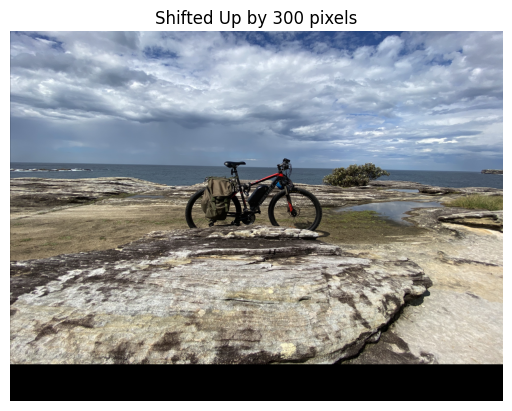

In [17]:
# Shift the image up by 300 pixels
shifted = imutils.translate(bike, 1, -300)
# Convert color space to RGB
shifted = cv2.cvtColor(shifted, cv2.COLOR_BGR2RGB)

# Display the shifted image
plt.imshow(shifted)
plt.title("Shifted Up by 300 pixels")
plt.axis("off")

#Rotation with OpenCV

Image rotation is a powerful technique in computer vision that enables us to rotate an image by a specified angle, allowing for perspective manipulation and exploration of new dimensions. This section will explore OpenCV's image rotation capabilities and uncover the secrets behind this transformative process.

The code snippet below demonstrates the implementation of image rotation using OpenCV. Let's break it down step by step:

1.  First, we define the image's dimensions and calculate the centre coordinates (cX, cY) based on the shape of the bike image.
2.  Next, we specify a list of rotation angles (rotation_angles) that determine the extent and direction of the desired rotations.

Now, let's delve into the code's intriguing aspect. Inside the for loop, you'll notice three distinct methods used to rotate an image:

* imutils.rotate: This function, available in the imutils library, provides a 
convenient way to rotate an image with a single function call.
* imutils.rotate_bound: Also part of the imutils library, this function ensures that no part of the image is cut off during rotation, preserving its boundaries.
* cv2.rotate: This method is built into OpenCV but requires constructing a rotation matrix and explicitly applying an affine warp, resulting in more verbose code.

We gain flexibility and adaptability when performing image rotations by utilising these different techniques. Depending on our specific requirements, we can leverage the simplicity of imutils.rotate, the boundary preservation of imutils.rotate_bound, or the customisation options provided by cv2.rotate.

*Hint: In most cases, the rotation will be around the centre of the image. However, OpenCV allows us to specify an arbitrary point if desired. Positive degrees indicate counterclockwise rotation, while negative degrees indicate clockwise rotation.

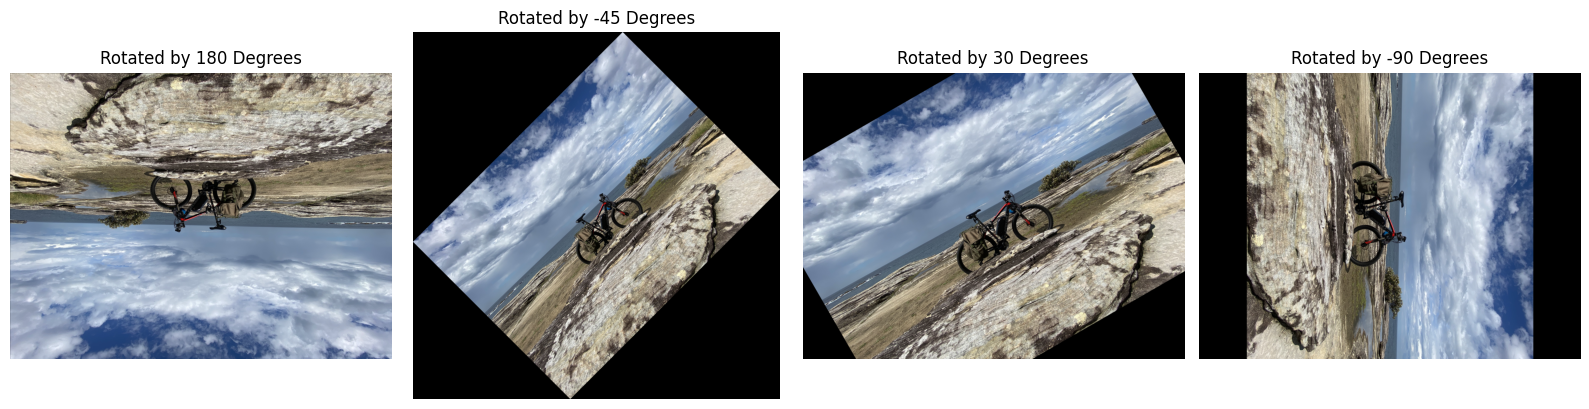

In [18]:
#Define dimensions of the image and calculate the center of the image
(h, w) = bike.shape[:2]
(cX, cY) = (w // 2, h // 2)

# Define the rotation angles
rotation_angles = [180, -45, 30, -90]

# Create a figure with subplots
fig, axs = plt.subplots(1, len(rotation_angles), figsize=(16, 4))

# Iterate over the rotation angles
for i, angle in enumerate(rotation_angles):
    # Rotate the image
    if angle == 180:
        rotated = imutils.rotate(bike, angle)
    elif angle == -45:
        rotated = imutils.rotate_bound(bike, angle)
    else:
        M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
        rotated = cv2.warpAffine(bike, M, (w, h))
    
    # Plot the rotated image
    axs[i].imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
    axs[i].set_title(f"Rotated by {angle} Degrees")
    axs[i].axis("off")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


(-0.5, 4031.5, 3023.5, -0.5)

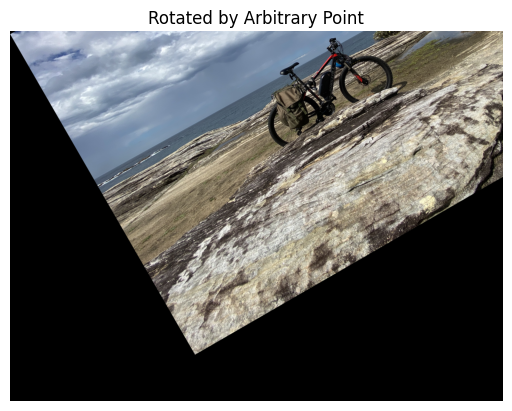

In [19]:
# Define the rotation parameters
# Rotate the image 30 degrees with a scaling factor of 1.0
# The rotation will be around the point (50, 10)
M = cv2.getRotationMatrix2D((50, 10), 30, 1.0)

# Apply the rotation to the image using the warpAffine function
rotated = cv2.warpAffine(bike, M, (w, h))

# Display the rotated image
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.title("Rotated by Arbitrary Point")
plt.axis('off')


#OpenCV Flip Image 

Image flipping is a typical operation in image processing that reverses an image's spatial orientation along a specific axis. OpenCV provides the **cv2.flip()** function for image flipping, allowing you to create mirror images or change the image's exposure.

To flip an image using **cv2.flip()**, you need two parameters: the image to be flipped and the flip code. The flip code determines the direction and type of flip to be applied. There are three flip codes you can use:

1.  Flip horizontally (code = 1): This code flips the image around the vertical axis, creating a mirror image horizontally.

2.  Flip vertically (code = 0): This code flips the image around the horizontal axis, creating a mirror image vertically.

3.  Flip horizontally and vertically (code = -1): This code performs horizontal and vertical flipping, creating a mirror image horizontally and vertically.

You can explore various orientations and mirror effects on the image by experimenting with different flip codes. Image flipping is valuable for applications like data augmentation, image manipulation, and visual effects. Applying these techniques can help generate more data when training deep learning algorithms.

The original image is displayed first in the provided code, followed by the flipped images using different flip codes. This allows you to observe the effects of horizontal, vertical, and horizontal-vertical flipping, visually comparing the different flip directions.

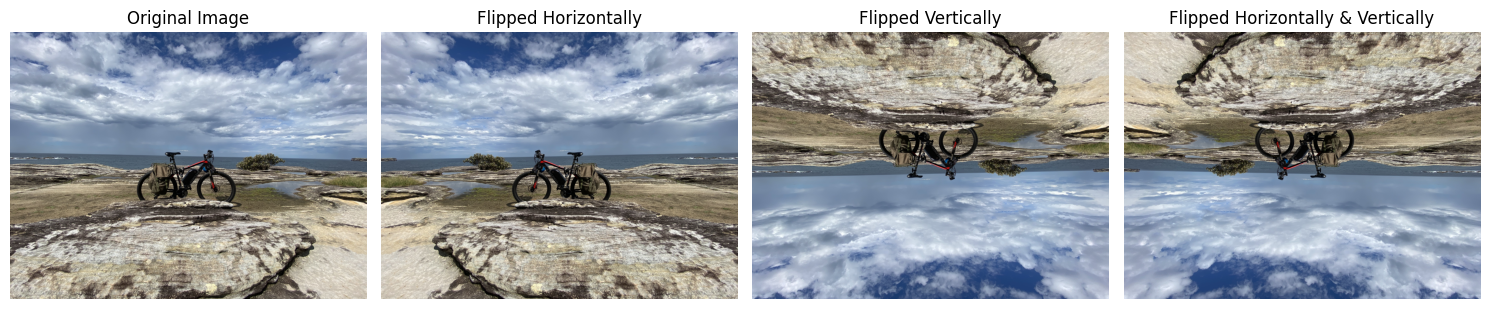

In [21]:

# List of flip codes
flip_codes = [1, 0, -1]
flip_labels = ['Flipped Horizontally', 'Flipped Vertically', 'Flipped Horizontally & Vertically']

# Create a subplot for displaying the flipped images
fig, axs = plt.subplots(1, len(flip_codes)+1, figsize=(15, 5))

# Display the original image
axs[0].imshow(cv2.cvtColor(bike, cv2.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis("off")

# Flip the image using different codes and display them in the plot
for i, code in enumerate(flip_codes, start=1):
    flipped = cv2.flip(bike, code)
    axs[i].imshow(cv2.cvtColor(flipped, cv2.COLOR_BGR2RGB))
    axs[i].set_title(flip_labels[i-1])
    axs[i].axis("off")

# Adjust spacing and display the plot
plt.tight_layout()

plt.show()


#Summary 

This notebook provides a comprehensive introduction to fundamental techniques in OpenCV, including translation, rotation, and flipping operations.


#Refrunses 

* https://github.com/PyImageSearch/imutils/tree/master
* https://pyimagesearch.com/practical-python-opencv/